# Correction

Correction to lab-intro's exercises.

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

## Data Science

### Linear Algebra: Matrix Standardization

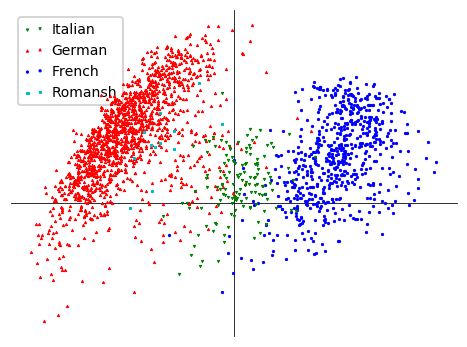

In [3]:
from modules.politics import extract_voting_pattern

# Load the data
X = np.load('data/votes-data.npy')

# Standardization
X -= X.mean(axis=0)
X /= X.std(axis=0)

# Plot the result
extract_voting_pattern(X, with_color=True)
plt.show()

### Probabilities: Histogram of a distribution

In [14]:
distribution1 = np.load('data/distribution1.npy')
distribution2 = np.load('data/distribution2.npy')
distribution3 = np.load('data/distribution3.npy')

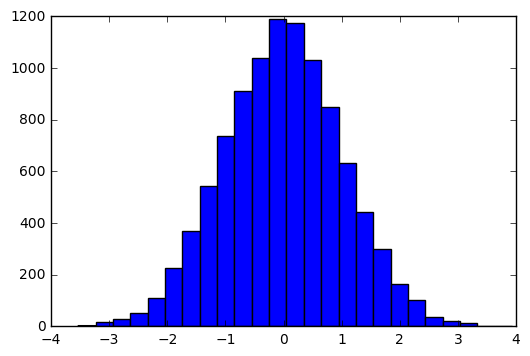

In [15]:
# Normal distribution
d1 = np.random.randn(10000)
np.save('distribution1.npy', d1)
plt.hist(d1, bins=25)
plt.show()

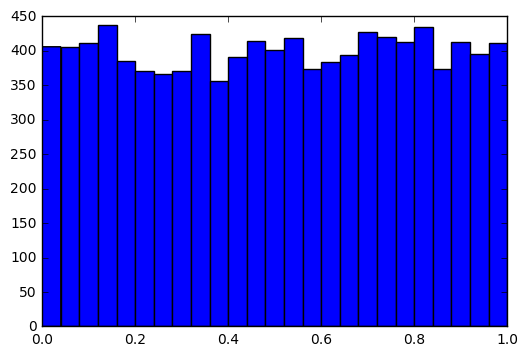

In [16]:
# Uniform distribution
d2 = np.random.rand(10000)
np.save('distribution2.npy', d2)
plt.hist(d2, bins=25)
plt.show()

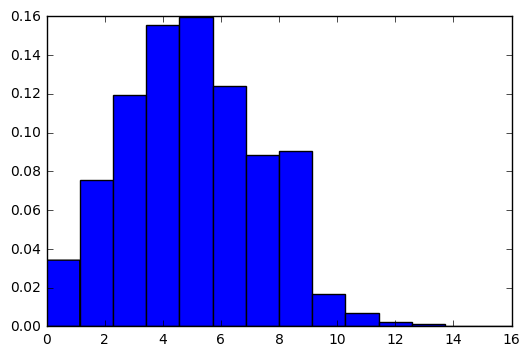

In [17]:
# Poisson (lambda = 5)
d3 = np.random.poisson(5, size=10000)
np.save('distribution3.npy', d3)
plt.hist(d3, bins=14, normed=True)
plt.show()

## Spark

### Dataset statistics

In [18]:
tweets = sc.textFile('election-day-tweets.txt')
word_counts = tweets.flatMap(lambda line: line.split()).map(lambda word: (word, 1)).reduceByKey(lambda a, b: a + b)


# Compute the total number of words
number_of_words = word_counts.map(lambda key_val: key_val[1]).reduce(lambda a, b: a + b)
print("Total number of words:", number_of_words)

# Average number of words per line
print("Average number of word per tweet:", number_of_words / 30000)

print("Ten most frequent words:")
# Ten most frequent words
most_frequent_words = word_counts.map(lambda key_val: (key_val[1], key_val[0])).sortByKey(ascending=False)
for count, word in most_frequent_words.take(10):
    print("%8s %4d" % (word, count))

Total number of words: 300882
Average number of word per tweet: 10.0294
Ten most frequent words:
Congress 8526
     the 6494
      to 5829
      of 4654
     for 3964
      in 3794
congress 3675
      is 3478
     and 3295
       a 2985


### Bigrams

In [19]:
def word_pairs(line):
    words = line.split()
    return [" ".join([a, b]) for a, b in zip(words, words[1:])]

bigrams = tweets.flatMap(word_pairs)
bigram_counts = bigrams.map(lambda x: (x, 1)).reduceByKey(lambda a, b: a + b)
most_frequent_bigram = bigram_counts.map(lambda key_val: (key_val[1], key_val[0])).sortByKey(ascending=False)

print("Ten most frequent bigrams:")
for count, bigram in most_frequent_bigram.take(10):
    print("%12s %3d" % (bigram, count))

Ten most frequent bigrams:
 of Congress 677
      of the 542
 Congress is 518
      in the 429
 in Congress 410
for Congress 366
    vote for 357
      up for 344
      can do 305
   for grabs 293


## Networks

### Visualization

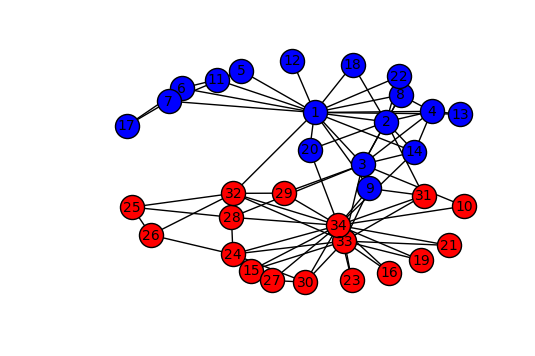

In [20]:
karate_club = nx.karate_club_graph()

# Get the position of the nodes
pos = nx.spring_layout(karate_club) # positions for all nodes

# Initialize data structures
labels = {}
officer = []
mr_hi = []

# Collect the labels and assign the nodes to clubs
for n in karate_club.nodes():
    club = karate_club.node[n]['club']
    if club == 'Officer':
        officer.append(n)
    else:
        mr_hi.append(n)
    labels[n] = n+1

# Draw the network
nx.draw_networkx_nodes(karate_club, pos, nodelist=officer, node_color='r')
nx.draw_networkx_nodes(karate_club, pos, nodelist=mr_hi, node_color='b')
nx.draw_networkx_edges(karate_club, pos)
nx.draw_networkx_labels(karate_club, pos, labels, font_size=10)
plt.axis('off');

  Node Degree
    33     17
     0     16
    32     12
     2     10
     1      9
    31      6
     3      6
    23      5
    13      5
     8      5


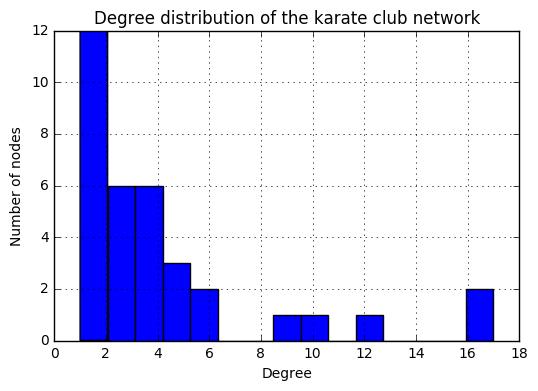

In [21]:
# Get the list of the degree per node
degrees = np.array(list((karate_club.degree().values())))

# Get the indices of the nodes in decreasing order w.r.t their degree
ind = np.argsort(degrees)[::-1]

# Print the 10 first nodes and 
nodes_degree = ["%6d %6d" % (a, b) for a, b in zip(ind, degrees[ind])][:10]
print("%6s %6s" % ("Node", "Degree"))
print('\n'.join(nodes_degree))

# Plot the histogram
plt.hist(degrees, bins=15)
plt.title("Degree distribution of the karate club network")
plt.xlabel("Degree")
plt.ylabel("Number of nodes")
plt.grid()
plt.show()